###TRABAJO PRÁCTICO N°1
Integrantes: \
-Enzo Ferrari \
-Abril Rodriguez \
-Micaela Pozzo

###Ejercicio 1

Exploración del Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Leer un archivo CSV
df = pd.read_csv('/content/Student_Performance.csv')

# Mostrar las primeras filas del DataFrame
print(df.head())


   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


In [2]:
# Obtener el número de filas y columnas
print("Número de filas y columnas:", df.shape)


Número de filas y columnas: (10000, 6)


In [3]:
# Obtener información sobre las columnas
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None


Podemos observar que no hay valores faltantes en el conjunto de datos.

##Descripción de las Columnas:
-Hours Studied: Columna de enteros que representa las horas estudiadas.\
-Previous Scores: Columna de enteros que representa puntajes anteriores.\
-Extracurricular Activities: Columna de tipo objeto (generalmente cadenas de texto) que representa actividades extracurriculares.\
-Sleep Hours: Columna de enteros que representa las horas de sueño.\
-Sample Question Papers Practiced: Columna de enteros que representa la cantidad de ejercicios prácticos.\
-Performance Index: Columna de números decimales (float64) que representa el índice de rendimiento.

In [4]:
# Obtener estadísticas descriptivas de las columnas numéricas
print(df.describe())


       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

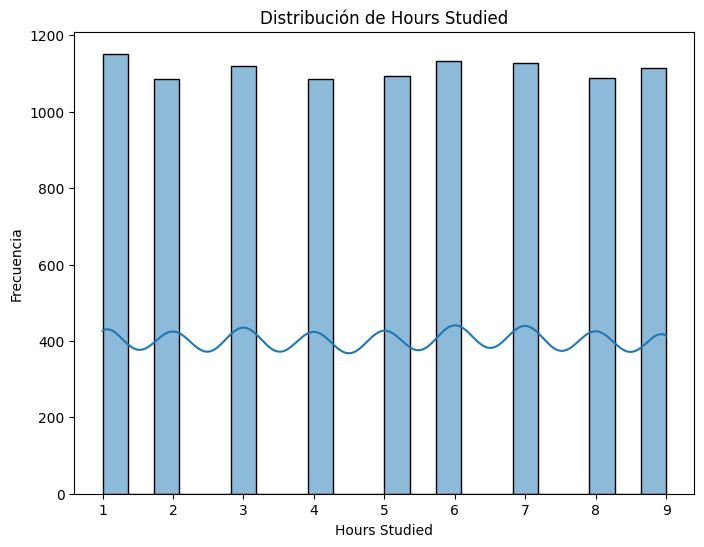

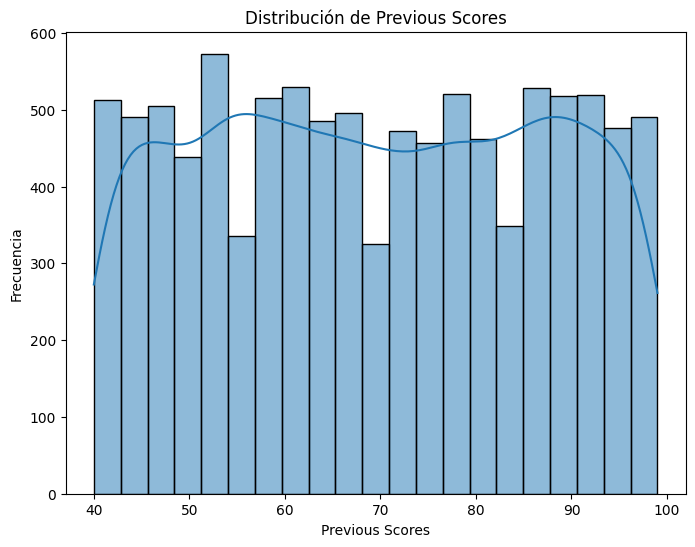

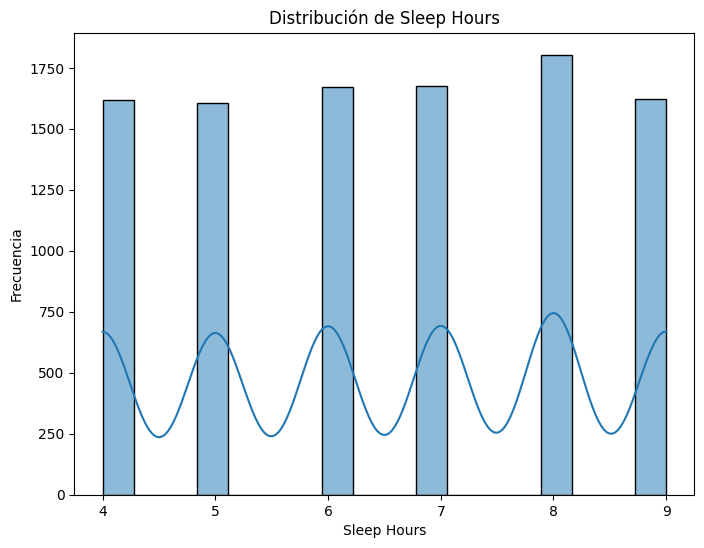

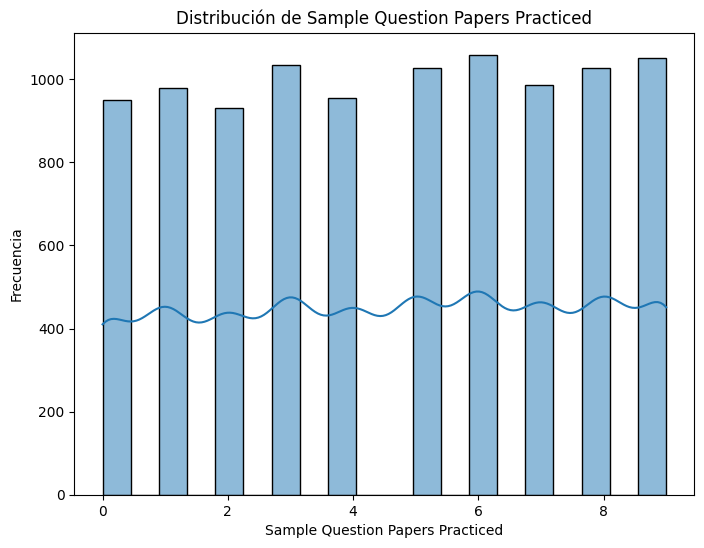

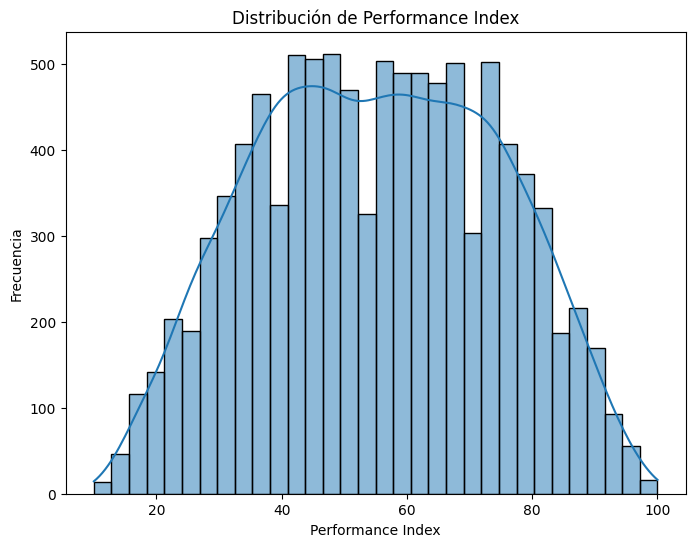

In [5]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Observar la distribución de las variables numéricas
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()


Analizamos la distribución de los datos en las variables y la de 'Performance index' es la que más se asemeja a una distribución normal. El resto de las variables son uniformes en el conjunto de datos, menos 'Previus Score' que es una distribución que se asemeja a una forma uniforme en su centro, con una frecuencia constante en la mayoría de los valores. Pero, se observan fluctuaciones y algunos valores atípicos que influyen en la apariencia general del histograma, dando lugar a una distribución rectangular modificada.

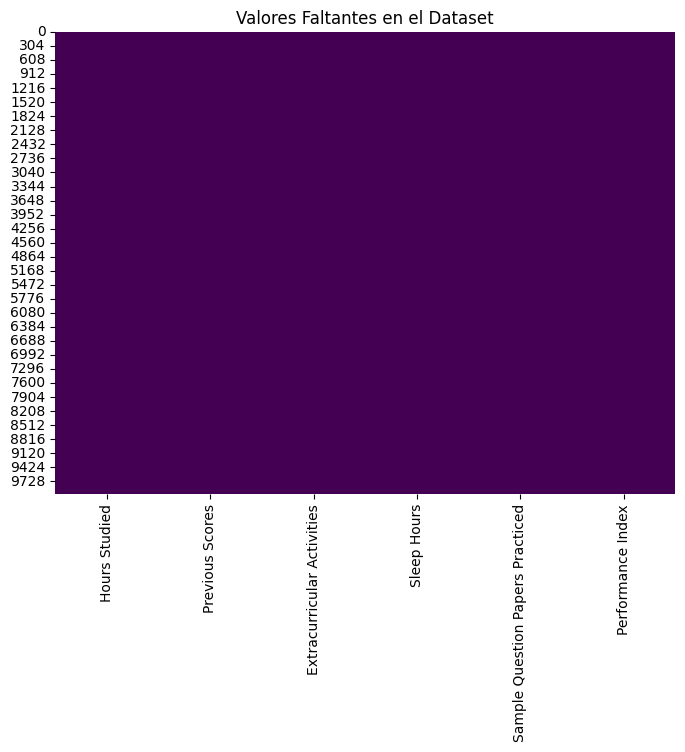

Valores faltantes por columna:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [6]:
# Identificar valores faltantes
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el Dataset')
plt.show()

# Contar valores faltantes por columna
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

No hay valores faltantes en el conjunto de datos.

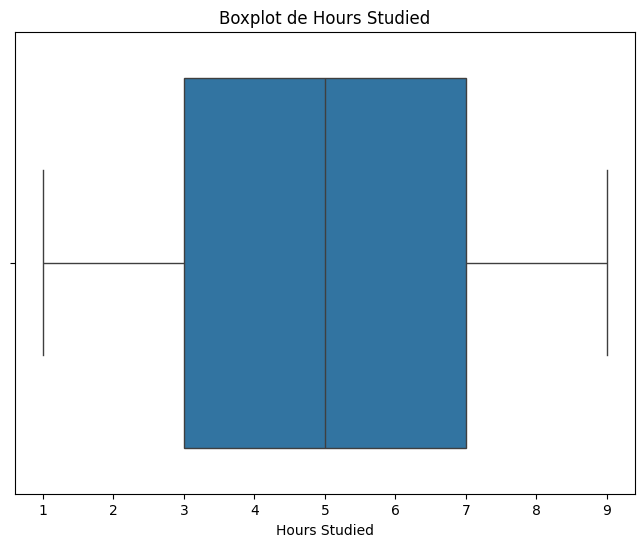

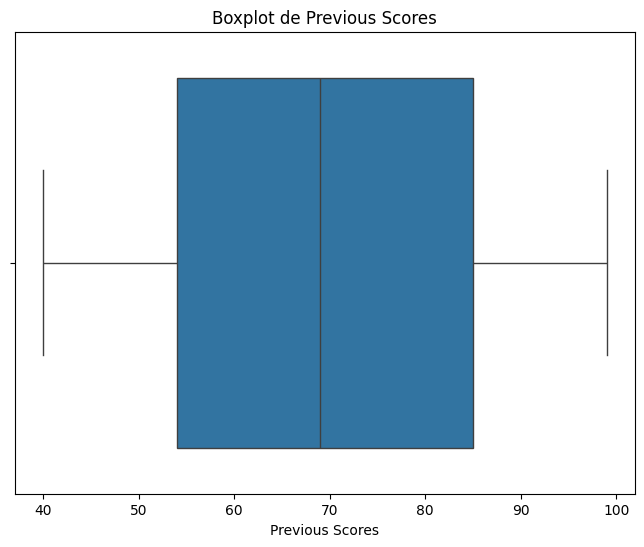

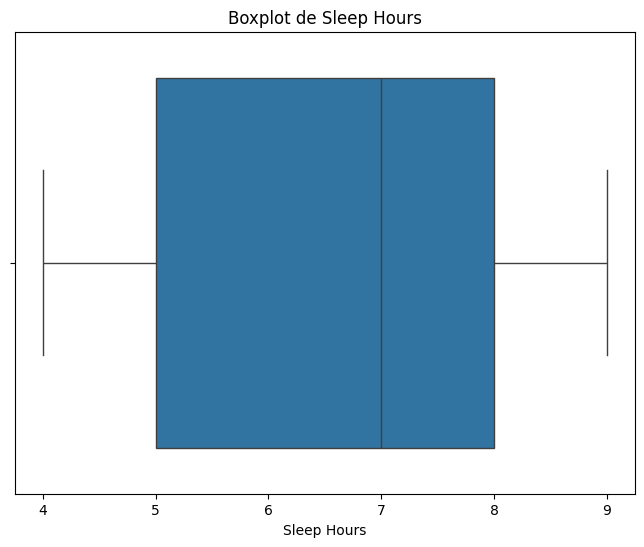

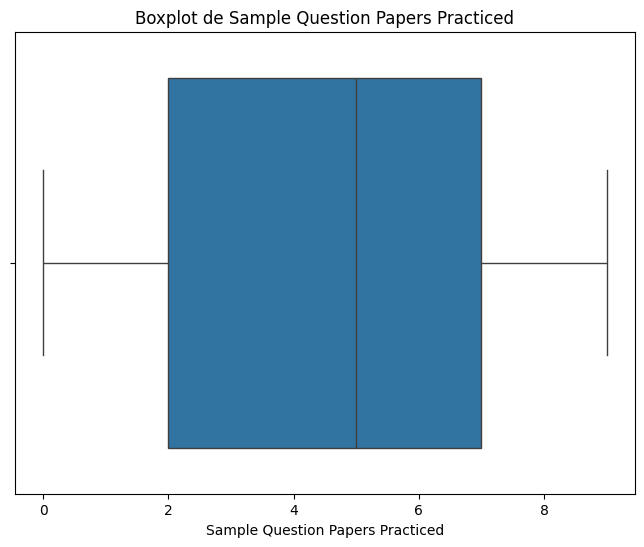

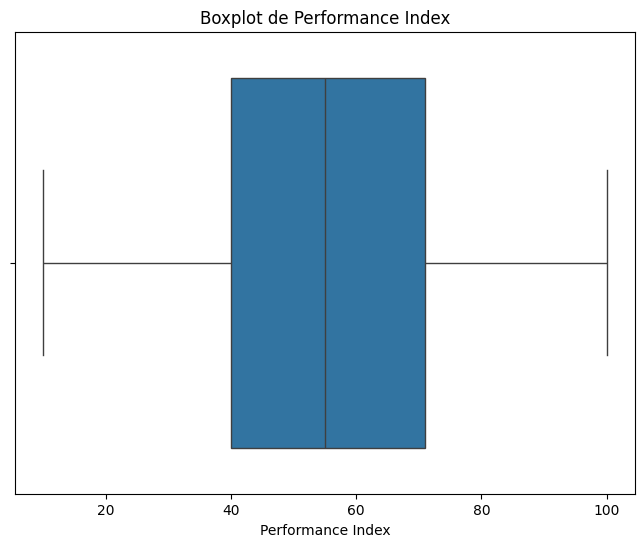

In [7]:
# Boxplots para identificar valores atípicos
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()


En los gráficos se puede observar una distribución relativamente simétrica y concentrada de los datos, con poca variabilidad extrema o valores atípicos notables en las variables: 'Hours Studied', 'Previus Scores' y 'Performance Index' y en las variables 'Sleep Hours' y 'Sample Question Parers Practiced' se observa una distribución sesgada hacia la derecha con la presencia potencial de valores extremos en el lado derecho.  

Matriz de correlación

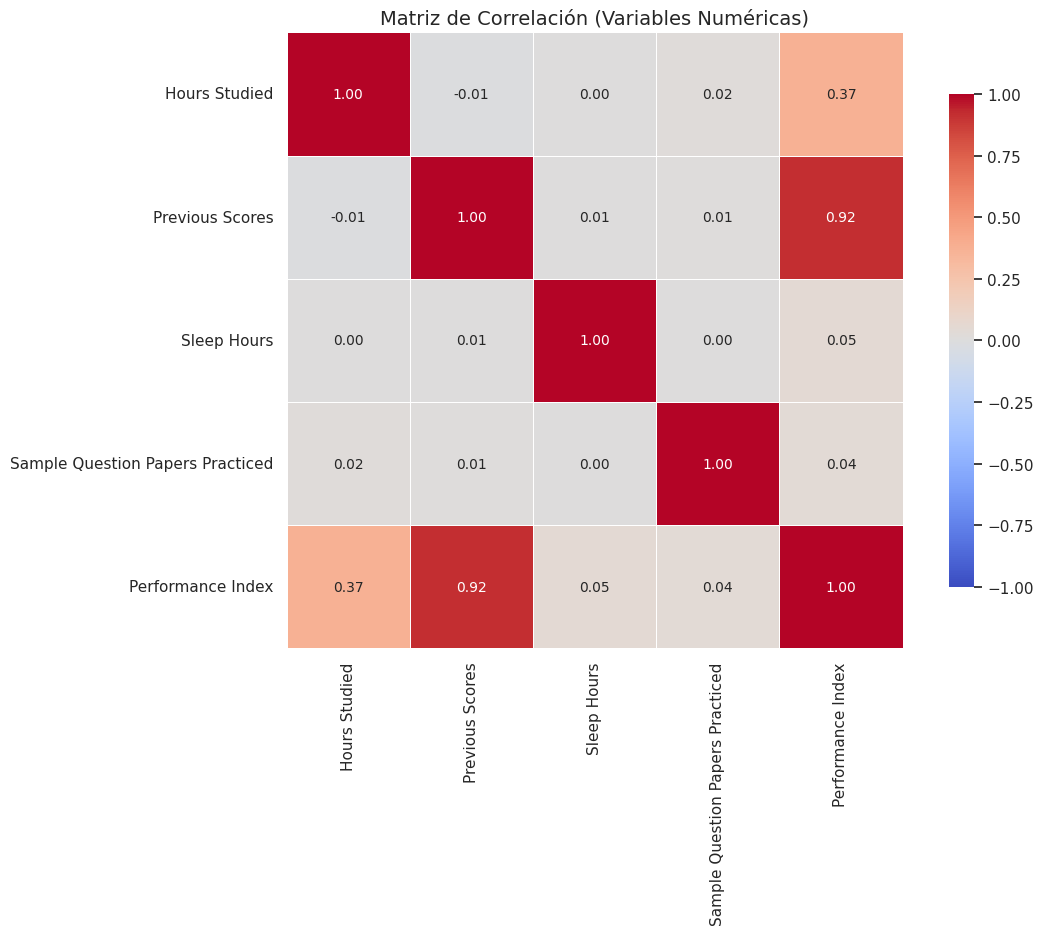

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo las columnas numéricas (eliminar las categóricas)
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Calcular la matriz de correlación
correlation_matrix_df = df_numeric.corr()

# Establecer estilo y paleta de colores
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_df, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10}, square=True, linewidths=0.5, linecolor='white', cbar_kws={"shrink": 0.8}, center=0, vmin=-1, vmax=1)
plt.title('Matriz de Correlación (Variables Numéricas)', fontsize=14)
plt.show()


En la matriz de correlación entre las variables podemos observar que hay fuerte relación entre las variables 'Previous Scores' y 'Performance index'. Entre 'Performance index' y 'Hours Studied' hay una relación positiva de moderada magnitud, no tan fuerte como las otras dos variables.

Division de train y test\
'Performance Index' va a ser nuestra variable objetivo.

In [9]:
# Separar características (X) y variable objetivo (y)
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']
from sklearn.model_selection import train_test_split

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
import pandas as pd

# Seleccionar solo las columnas numéricas para escalar
numeric_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
categorical_columns = ['Extracurricular Activities']

Escalado de variables numéricas y codificación de variables categóricas

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split



# Inicializar el StandardScaler y ajustar solo al conjunto de entrenamiento
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = X_test.copy()
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Inicializar el OneHotEncoder y ajustar solo al conjunto de entrenamiento
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train_scaled[categorical_columns]),
                               columns=encoder.get_feature_names_out(categorical_columns),
                               index=X_train.index)
X_test_encoded = pd.DataFrame(encoder.transform(X_test_scaled[categorical_columns]),
                              columns=encoder.get_feature_names_out(categorical_columns),
                              index=X_test.index)

# Eliminar las columnas categóricas originales de X_train_scaled y X_test_scaled
X_train_scaled = X_train_scaled.drop(categorical_columns, axis=1)
X_test_scaled = X_test_scaled.drop(categorical_columns, axis=1)

# Combinar las columnas originales escaladas (menos las categóricas) con las columnas categóricas codificadas
X_train_final = pd.concat([X_train_scaled, X_train_encoded], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test_encoded], axis=1)

# Mostrar las primeras filas del DataFrame final del conjunto de entrenamiento
print("DataFrame Final con Columnas Numéricas Escaladas y Categóricas Codificadas para el Conjunto de Entrenamiento:")
print(X_train_final.head())

# Mostrar las primeras filas del DataFrame final del conjunto de prueba
print("DataFrame Final con Columnas Numéricas Escaladas y Categóricas Codificadas para el Conjunto de Prueba:")
print(X_test_final.head())




DataFrame Final con Columnas Numéricas Escaladas y Categóricas Codificadas para el Conjunto de Entrenamiento:
      Hours Studied  Previous Scores  Sleep Hours  \
9254       0.006455        -1.183844     0.269888   
1561      -1.149747        -1.241506     0.269888   
1670      -1.149747         0.661318     0.269888   
6087      -1.149747        -1.356828    -0.318906   
6669       1.162658        -1.299167     1.447477   

      Sample Question Papers Practiced  Extracurricular Activities_No  \
9254                          0.134041                            1.0   
1561                          0.483562                            0.0   
1670                         -0.914520                            1.0   
6087                         -1.264041                            1.0   
6669                         -1.613561                            1.0   

      Extracurricular Activities_Yes  
9254                             0.0  
1561                             1.0  
1670           

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Análisis exploratorio de datos para comprender mejor la distribución de las variables después de aplicar las transformaciones.

<ipython-input-12-e06e89b06246>:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(data=X_train_final[numeric_columns], palette=palette)


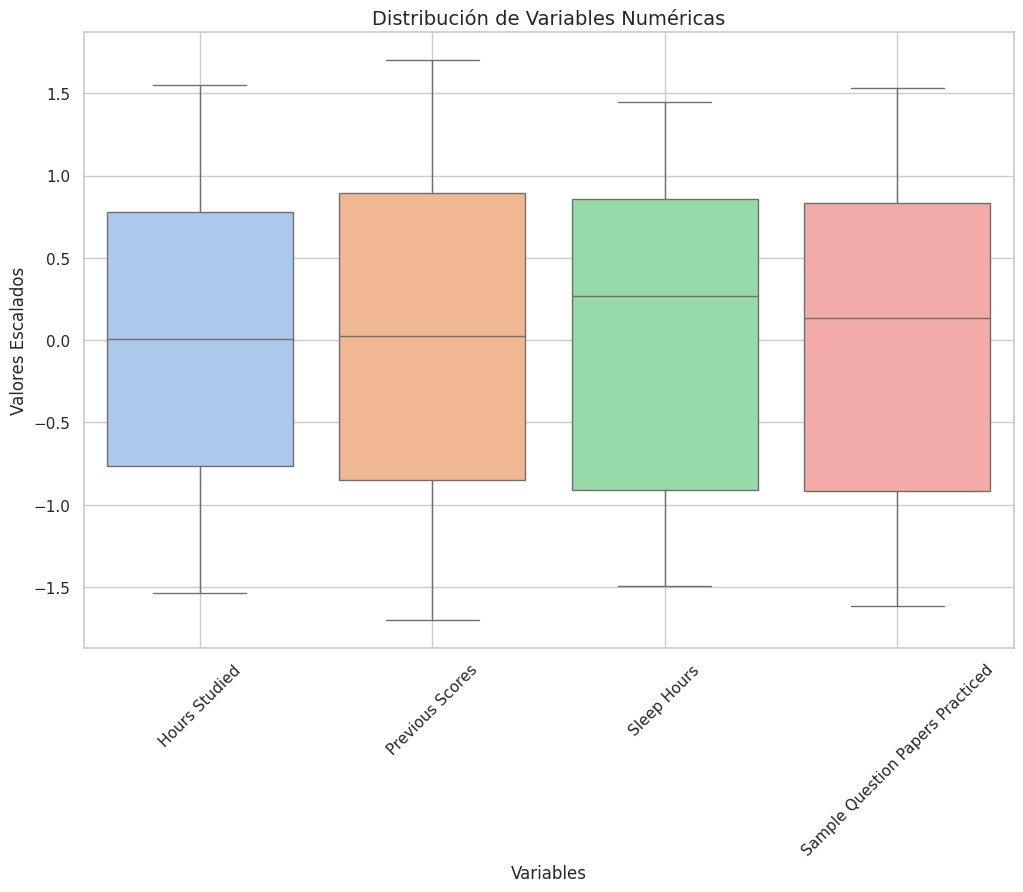

<ipython-input-12-e06e89b06246>:27: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(data=X_train_final[categorical_encoded_columns], palette=palette)


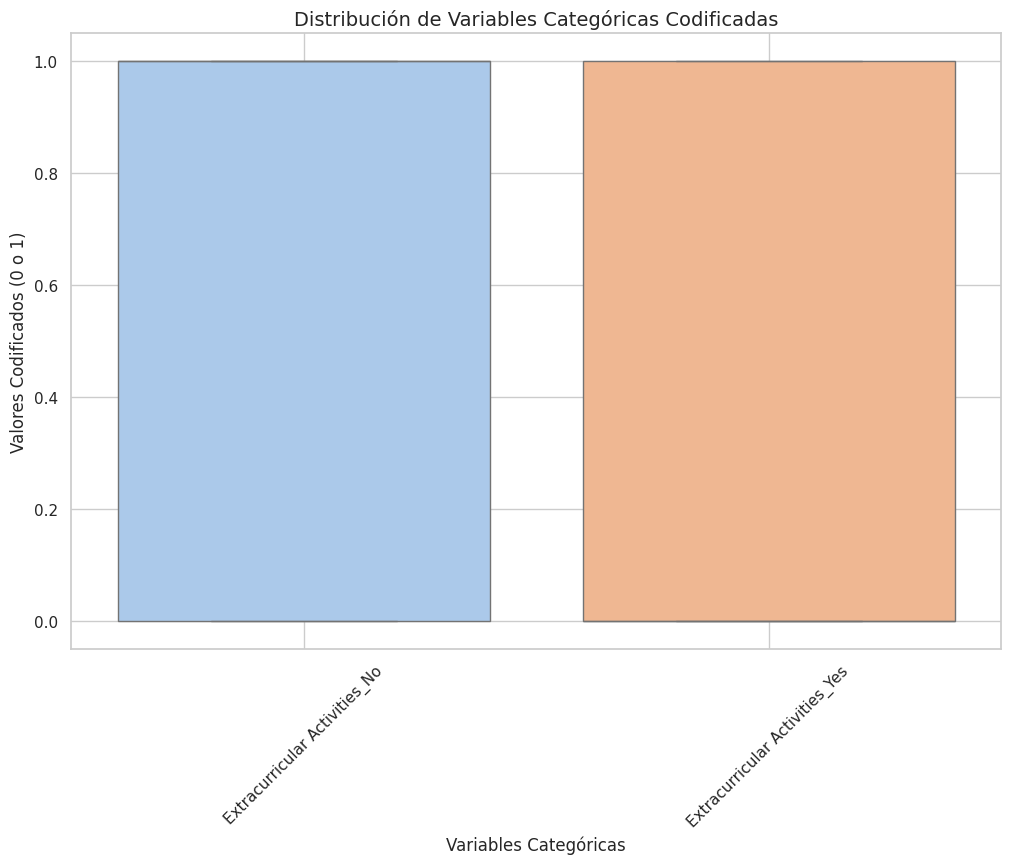

In [12]:
# Crear boxplots de las variables numéricas escaladas para el conjunto de entrenamiento
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo y la paleta de colores
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")



# Visualizar distribución de las variables numéricas (Boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_train_final[numeric_columns], palette=palette)
plt.title("Distribución de Variables Numéricas", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Valores Escalados", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)  # Agregar cuadrícula
plt.show()


# Obtener las columnas categóricas codificadas
categorical_encoded_columns = X_train_final.filter(regex='^Extracurricular').columns

# Visualizar distribución de las variables categóricas codificadas (Boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_train_final[categorical_encoded_columns], palette=palette)
plt.title("Distribución de Variables Categóricas Codificadas", fontsize=14)
plt.xlabel("Variables Categóricas", fontsize=12)
plt.ylabel("Valores Codificados (0 o 1)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)  # Agregar cuadrícula
plt.show()

Podemos observar las variables finales después de las transformaciones.

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Combinar los conjuntos de entrenamiento y prueba para hacer análisis estadísticos
df_final = pd.concat([X_train_final, X_test_final], axis=0)

# Imprimir las primeras filas del DataFrame final
print("DataFrame Final con Columnas Numéricas Escaladas y Categóricas Codificadas:")
print(df_final.head())

# Verificar estadísticas de las columnas numéricas en df_final
print("\nEstadísticas de las Columnas Numéricas en df_final:")
print(df_final[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']].describe())

# Verificar las columnas categóricas codificadas en df_final
print("\nColumnas Categóricas Codificadas en df_final:")
categorical_columns = df_final.filter(regex='^Extracurricular').columns
for column in categorical_columns:
    print(f"\nEstadísticas de la columna categórica codificada {column}:")
    print(df_final[column].value_counts())

# Verificar las dimensiones del DataFrame final
print("\nDimensiones del DataFrame Final (filas, columnas):")
print(df_final.shape)


DataFrame Final con Columnas Numéricas Escaladas y Categóricas Codificadas:
      Hours Studied  Previous Scores  Sleep Hours  \
9254       0.006455        -1.183844     0.269888   
1561      -1.149747        -1.241506     0.269888   
1670      -1.149747         0.661318     0.269888   
6087      -1.149747        -1.356828    -0.318906   
6669       1.162658        -1.299167     1.447477   

      Sample Question Papers Practiced  Extracurricular Activities_No  \
9254                          0.134041                            1.0   
1561                          0.483562                            0.0   
1670                         -0.914520                            1.0   
6087                         -1.264041                            1.0   
6669                         -1.613561                            1.0   

      Extracurricular Activities_Yes  
9254                             0.0  
1561                             1.0  
1670                             0.0  
6087      

In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 9254 to 6929
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  float64
 1   Previous Scores                   10000 non-null  float64
 2   Sleep Hours                       10000 non-null  float64
 3   Sample Question Papers Practiced  10000 non-null  float64
 4   Extracurricular Activities_No     10000 non-null  float64
 5   Extracurricular Activities_Yes    10000 non-null  float64
dtypes: float64(6)
memory usage: 546.9 KB


Guardamos el dataframe final

In [15]:
# Guardar el DataFrame final en un archivo CSV
df_final.to_csv('dataset_final.csv', index=False)

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


Definición del modelo

In [17]:
# Inicializar el modelo secuencial con regularización L2
from keras import regularizers
model = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train_final.shape[1],)),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)  # Capa de salida para regresión lineal
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:

# Entrenar el modelo
history = model.fit(X_train_final, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
200/200 [==============================] - 3s 7ms/step - loss: 1729.5808 - val_loss: 34.5288
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 28.2165 - val_loss: 22.9530
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 20.3400 - val_loss: 17.0269
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 15.2867 - val_loss: 12.9061
Epoch 5/50
200/200 [==============================] - 2s 8ms/step - loss: 11.8324 - val_loss: 10.1169
Epoch 6/50
200/200 [==============================] - 2s 9ms/step - loss: 9.4204 - val_loss: 8.1391
Epoch 7/50
200/200 [==============================] - 2s 10ms/step - loss: 7.8423 - val_loss: 6.9266
Epoch 8/50
200/200 [==============================] - 1s 5ms/step - loss: 6.7172 - val_loss: 6.1201
Epoch 9/50
200/200 [==============================] - 1s 4ms/step - loss: 5.9901 - val_loss: 5.3874
Epoch 10/50
200/200 [==============================] - 1s 4ms/step - loss: 5.4994 - val

In [19]:
# Evaluar el modelo con el conjunto de prueba
mse_final = model.evaluate(X_test_final, y_test)
print(f'MSE (Mean Squared Error) en el conjunto de prueba: {mse_final}')


63/63 [==============================] - 0s 1ms/step - loss: 4.4442
MSE (Mean Squared Error) en el conjunto de prueba: 4.444197177886963


In [20]:

# Predicciones
y_pred_final = model.predict(X_test_final)

63/63 [==============================] - 0s 1ms/step


In [21]:
# Calcular el coeficiente de determinación (R²)
from sklearn.metrics import r2_score
# Obtener las predicciones del modelo en el conjunto de prueba
y_pred_final = model.predict(X_test_final)
# Calcular R²
r2_final = r2_score(y_test, y_pred_final)
print(f'Coeficiente de Determinación (R²) en el conjunto de prueba: {r2_final}')

63/63 [==============================] - 0s 1ms/step
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.9882523133020633


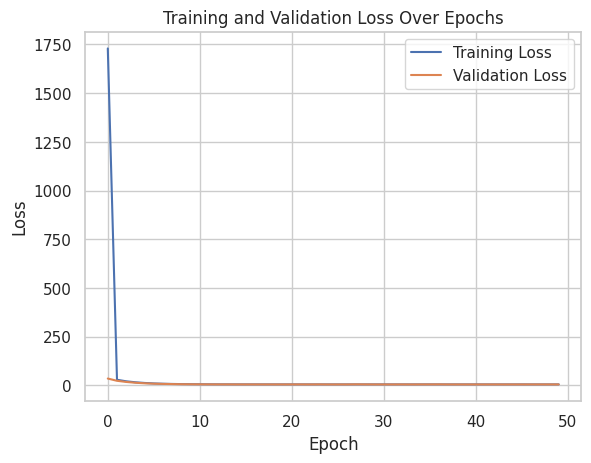

In [22]:
# Plot de la pérdida durante el entrenamiento
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


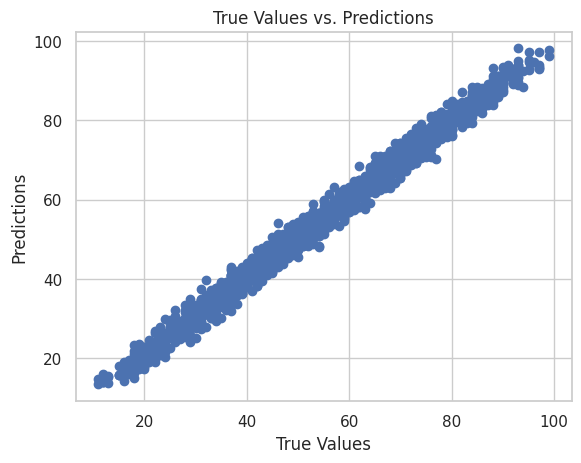

In [23]:
# Comparar predicciones vs. etiquetas verdaderas
plt.scatter(y_test, y_pred_final)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.show()


El cálculo del coeficiente de determinación (R²) como medida de rendimiento del modelo.
Obtuvimos un coeficiente de determinación (R²) de 0.98 es un buen resultado que indica que el modelo de regresión está capturando de manera efectiva la estructura subyacente en los datos y es capaz de hacer predicciones altamente precisas sobre la variable de interés.

Conclusiones e Interpretación:
El modelo ha demostrado un rendimiento sólido con un MSE de 4.45 y un R² de 0.988
La alta correlación (R²) sugiere que el modelo explica casi el 99% de la variabilidad en la variable objetivo.
Las visualizaciones proporcionadas ayudan a visualizar la calidad de las predicciones y el proceso de aprendizaje del modelo. Estos resultados indican un modelo altamente predictivo y bien ajustado a los datos utilizados en la evaluación.

# Correcciones y Modelo más chico

En esta sección modificaremos el ejercicio según las correcciones enviadas por los profesores. Tendremos en cuenta la fuga de datos en el procesamiento de los datos, y entrenaremos un modelo con una estructura más sencilla, teniendo en cuenta que hay variables con alto nivel de correlación.

Para ello, comenzamos cargando nuevamente el dataset, y graficando un mapa de calor con las correlaciones entre variables.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras import regularizers, layers, Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

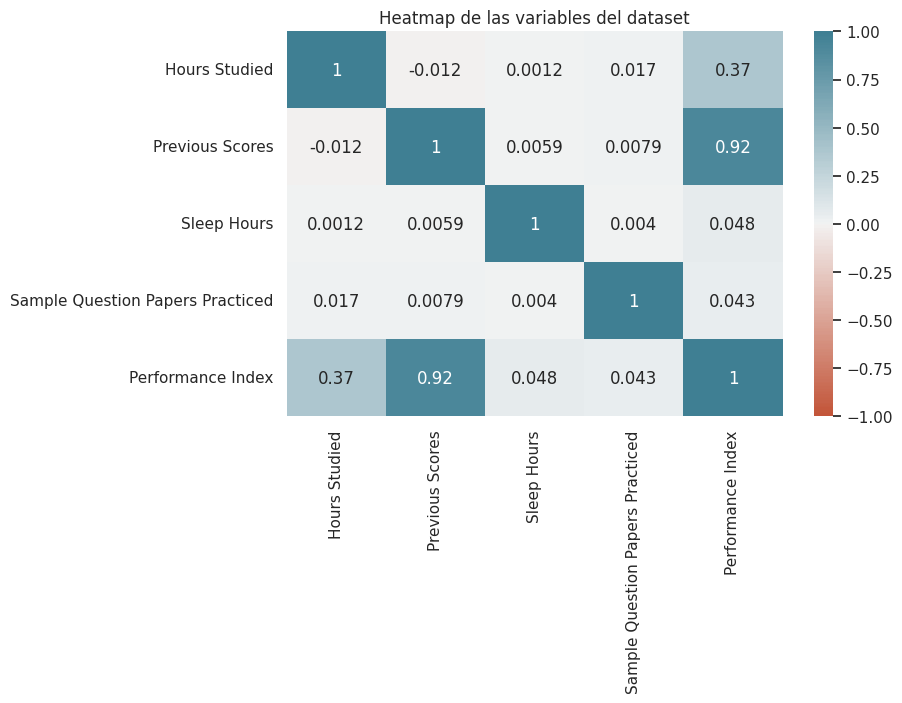

In [25]:
data = pd.read_csv('/content/Student_Performance.csv')

def plot_heatmap(df):
    '''Recibe un dataframe y grafica el mapa de calor
    para correlaciones entre sus variables.'''

    matrix_corr = df.corr()
    plt.figure(figsize=(8, 5))
    ax = sns.heatmap(
        matrix_corr,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        annot=True
    )
    plt.title('Heatmap de las variables del dataset')
    plt.show()

plot_heatmap(data.drop('Extracurricular Activities', axis=1))

Observando los coeficientes de Pearson, se evidencia una fuerte relación lineal entre 'Previous Scores' y la variable objetivo 'Performance Index', con un 0.92.

#División de train y test
'Performance Index' va a ser la variable objetivo y 'Previous Scores' 'Hours Studied' las variables predictoras.

In [26]:
X = data.drop('Performance Index', axis=1) #variables predictoras
y = data['Performance Index'] #variable a predecir (objetivo)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A continuación, debemos procesar el conjunto de entrenamiento y luego aplicar los cambios al conjunto de prueba para evitar la fuga de datos.

El procesamiento a realizar es: obtener dummies para la variable categórica y estandarizar las variables numéricas sin fuga de datos.

In [27]:
X_train_encoded = pd.get_dummies(X_train, columns=['Extracurricular Activities'])
X_test_encoded = pd.get_dummies(X_test, columns=['Extracurricular Activities'])

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# se codificaron como booleanos, entonces los paso a enteros
X_train_encoded = X_train_encoded.astype(int)
X_test_encoded = X_test_encoded.astype(int)

Ahora, estandarizamos las variables numéricas utilizando StandardScaler, asegurándonos de que no haya fuga de datos.

In [28]:
scaler = StandardScaler()

numeric_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()

X_train_scaled[numeric_columns] = scaler.fit_transform(X_train_encoded[numeric_columns])
X_test_scaled[numeric_columns] = scaler.transform(X_test_encoded[numeric_columns])

# para que los índices estén alineados
X_train_scaled.index = X_train.index
X_test_scaled.index = X_test.index

In [29]:
X_train_scaled

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_No,Extracurricular Activities_Yes
9254,0.006455,-1.183844,0.269888,0.134041,1,0
1561,-1.149747,-1.241506,0.269888,0.483562,0,1
1670,-1.149747,0.661318,0.269888,-0.914520,1,0
6087,-1.149747,-1.356828,-0.318906,-1.264041,1,0
6669,1.162658,-1.299167,1.447477,-1.613561,1,0
...,...,...,...,...,...,...
5734,1.162658,-1.126183,-0.318906,0.483562,0,1
5191,-0.378946,-0.088279,1.447477,-0.565000,1,0
5390,1.548059,-1.241506,0.269888,0.483562,1,0
860,-1.535148,-1.299167,1.447477,-1.613561,1,0


Teniendo en cuenta que una de las variables tiene una fuerte correlación lineal con la variable objetivo, armaremos un modelo más simple para entrenar.

Por eso, tendremos en cuenta como únicas variables predictoras a: 'Previous Scores' y 'Hours Studied', las cuales demostraron mayor correlación con la variable objetivo 'Previous Scores'.

In [30]:
prev_scores_train = X_train_scaled[['Previous Scores', 'Hours Studied']]
prev_scores_test = X_test_scaled['Previous Scores']

#Definición del modelo
Creamos la arquitectura del modelo de red neuronal con tres capas densas, más la capa de salida de una única neurona.

Aquí experimentamos distintas arquitecturas, añadiendo dropout y regularizaciones pero llegábamos a modelos con underfitting. Por lo tanto, decidimos no añadir dichas técnicas.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras import regularizers, layers, Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from sklearn.model_selection import train_test_split

In [32]:
model_chico = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(prev_scores_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1)  # Capa de salida para regresión lineal
])

# compilo y entreno el modelo
model_chico.compile(optimizer='adam', loss='mean_squared_error')
history_mod_chico = model_chico.fit(prev_scores_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=8))

Epoch 1/50
400/400 [==============================] - 3s 4ms/step - loss: 1201.2446 - val_loss: 40.5007
Epoch 2/50
400/400 [==============================] - 1s 2ms/step - loss: 23.6996 - val_loss: 12.1305
Epoch 3/50
400/400 [==============================] - 1s 2ms/step - loss: 9.3209 - val_loss: 6.7970
Epoch 4/50
400/400 [==============================] - 1s 2ms/step - loss: 6.4636 - val_loss: 5.5661
Epoch 5/50
400/400 [==============================] - 1s 2ms/step - loss: 5.7356 - val_loss: 5.2329
Epoch 6/50
400/400 [==============================] - 1s 2ms/step - loss: 5.5142 - val_loss: 5.2748
Epoch 7/50
400/400 [==============================] - 1s 2ms/step - loss: 5.5083 - val_loss: 5.5144
Epoch 8/50
400/400 [==============================] - 1s 2ms/step - loss: 5.5094 - val_loss: 5.1775
Epoch 9/50
400/400 [==============================] - 1s 2ms/step - loss: 5.5177 - val_loss: 5.2665
Epoch 10/50
400/400 [==============================] - 1s 2ms/step - loss: 5.4573 - val_loss: 

A continuación, definimos la función '**regression_metrics**' que nos mostrará las métricas de interés para este problema de regresión y un gráfico sobre la evolución del error a través de las épocas.

63/63 [==============================] - 0s 1ms/step
Métricas de evaluación del modelo:
Error Cuadrático Medio (MSE): 5.29
Error Absoluto Medio (MAE): 1.84
Coeficiente de Determinación (R²): 0.99
Error Cuadrático Medio Raíz (RMSE): 2.30


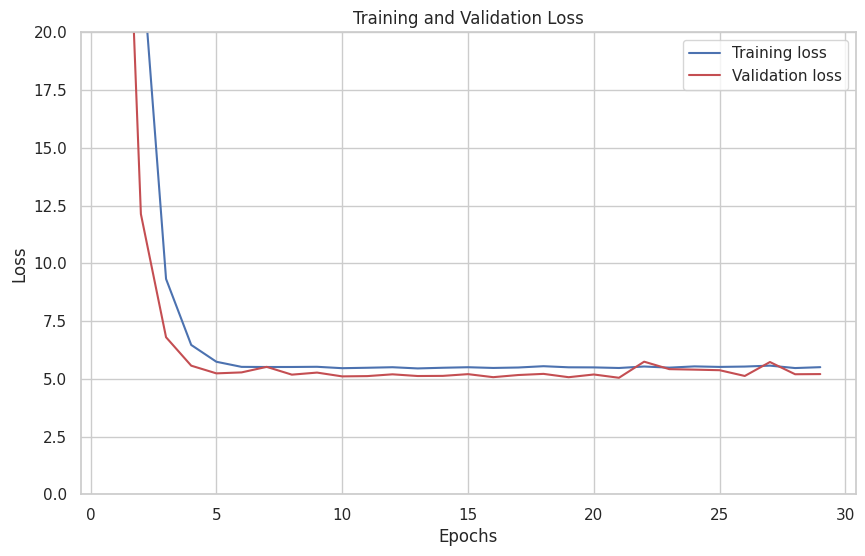

In [33]:
def regression_metrics(y_true, y_pred, history=None):
    '''Muestra las métricas de regresión y la evolución del error'''
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)

    print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
    print(f'Error Absoluto Medio (MAE): {mae:.2f}')
    print(f'Coeficiente de Determinación (R²): {r2:.2f}')
    print(f'Error Cuadrático Medio Raíz (RMSE): {rmse:.2f}')

    if history:
        # gráfico de la evolución del error durante el entrenamiento
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs = range(1, len(loss) + 1)

        plt.figure(figsize=(10, 6))
        plt.plot(epochs, loss, 'b', label='Training loss')
        plt.plot(epochs, val_loss, 'r', label='Validation loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.ylim(0, 20)
        plt.legend()
        plt.grid(True)
        plt.show()


prev_scores_test = X_test_scaled[['Previous Scores', 'Hours Studied']]
y_pred = model_chico.predict(prev_scores_test) # hago predicciones

print("Métricas de evaluación del modelo:")
regression_metrics(y_test, y_pred, history_mod_chico)


#Conclusión:
Observando las métricas resultantes, concluimos que el modelo tiene excelente capacidad predictiva, aún sin haber tenido en cuenta aquellas variables con poca correlación con la variable objetivo.